# Setup


In [1]:
# Clone the Matterport RCNN
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 13.29 MiB/s, done.
Resolving deltas: 100% (562/562), done.


In [2]:
# Clone tools for saliency maps
!git clone https://github.com/asyrovprog/cs230project

Cloning into 'cs230project'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 65 (delta 14), reused 33 (delta 2), pack-reused 9
Unpacking objects: 100% (65/65), done.


In [3]:
# Check python version
!python --version

Python 3.7.12


In [4]:
# Install right version of h5py
!pip install 'h5py==2.10.0' --force-reinstall


     |████████████████████████████████| 2.9 MB 8.7 MB/s 
     |████████████████████████████████| 15.7 MB 141 kB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires h5py~=3.1.0, but you have h5py 2.10.0 which is incompatible.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.3 which is incompatible.
tensorflow 2.6.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
google-co

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
!pip uninstall vis
!pip install git+https://github.com/raghakot/keras-vis.git -U

  Cloning https://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-tuyeykxj
  Running command git clone -q https://github.com/raghakot/keras-vis.git /tmp/pip-req-build-tuyeykxj
  Created wheel for keras-vis: filename=keras_vis-0.5.0-py2.py3-none-any.whl size=38899 sha256=a296f5ea998a8362fb5294c6f3164ba8206279ebb499264e86b12ca4694e9c41
  Stored in directory: /tmp/pip-ephem-wheel-cache-9swmcs3h/wheels/09/c1/10/1bc85a53a0eb5c3d760dece6962c5061addaaea9286f0248a4
Successfully built keras-vis
  Attempting uninstall: keras-vis
    Found existing installation: keras-vis 0.4.1
    Uninstalling keras-vis-0.4.1:
      Successfully uninstalled keras-vis-0.4.1


In [ ]:
#Change line 2199 in model file to self.keras_model.add_metric(loss, name)

In [3]:
!pwd
%cd Mask_RCNN/

/content
/content/Mask_RCNN


In [4]:
# Run the installation script
!python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'ma

In [5]:
# Confirm installation
!pip show mask_rcnn

Name: mask-rcnn
Version: 2.1
Summary: Mask R-CNN for object detection and instance segmentation
Home-page: https://github.com/matterport/Mask_RCNN
Author: Matterport
Author-email: waleed.abdulla@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages/mask_rcnn-2.1-py3.7.egg
Requires: 
Required-by: 


In [6]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# copy weights over
!cp '/content/drive/MyDrive/DMI/RCNN/Trained Weights/mask_rcnn_object_0020.h5' ./

# copy tools needed for saliency maps
!cp '/content/cs230project/src/image_tools.py' ./
!cp '/content/cs230project/src/metrics.py' ./

In [8]:
import os
import sys
import json
import datetime
import numpy as np
import skimage.draw
import cv2
from mrcnn.visualize import display_instances
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("/content/Mask_RCNN/")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import model as modellib, utils

# Path to trained weights file
COCO_WEIGHTS_PATH = os.path.join(ROOT_DIR, "mask_rcnn_object_0020.h5")

# Directory to save logs and model checkpoints, if not provided
# through the command line argument --logs
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")

Using TensorFlow backend.


In [9]:
class CustomConfig(Config):
    """Configuration for training on the toy  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "object"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 2

    # Number of classes (including background)
    NUM_CLASSES = 1 + 3  # Background + dent, scratch, scuff

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 5000

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9

In [ ]:
class CustomDataset(utils.Dataset):

    def load_custom(self, dataset_dir, subset):
        """Load a subset of the Dog-Cat dataset.
        dataset_dir: Root directory of the dataset.
        subset: Subset to load: train or val
        """
        # Add classes. We have only one class to add.
        self.add_class("object", 1, "scuff")
        self.add_class("object", 2, "scratch")
        self.add_class("object", 3, "dent")

        # Train or validation dataset?
        assert subset in ["train", "val"]
        dataset_dir = os.path.join(dataset_dir, subset)

        # Load annotations
        # VGG Image Annotator saves each image in the form:
        # { 'filename': '28503151_5b5b7ec140_b.jpg',
        #   'regions': {
        #       '0': {
        #           'region_attributes': {},
        #           'shape_attributes': {
        #               'all_points_x': [...],
        #               'all_points_y': [...],
        #               'name': 'polygon'}},
        #       ... more regions ...
        #   },
        #   'size': 100202
        # }
        # We mostly care about the x and y coordinates of each region
        annotations1 = json.load(open(os.path.join(dataset_dir, "via_project.json")))
        # print(annotations1)
        annotations = list(annotations1.values())  # don't need the dict keys

        # The VIA tool saves images in the JSON even if they don't have any
        # annotations. Skip unannotated images.
        annotations = [a for a in annotations if a['regions']]
        
        # Add images
        for a in annotations:
            # print(a)
            # Get the x, y coordinaets of points of the polygons that make up
            # the outline of each object instance. There are stores in the
            # shape_attributes (see json format above)
            polygons = [r['shape_attributes'] for r in a['regions']] 
            objects = [s['region_attributes']['Labels'] for s in a['regions']]
            print("objects:",objects)
            name_dict = {"scuff": 1,"scratch": 2,"dent": 3}
            # key = tuple(name_dict)
            num_ids = [name_dict[a] for a in objects]
     
            # num_ids = [int(n['Event']) for n in objects]
            # load_mask() needs the image size to convert polygons to masks.
            # Unfortunately, VIA doesn't include it in JSON, so we must read
            # the image. This is only managable since the dataset is tiny.
            print("numids",num_ids)
            image_path = os.path.join(dataset_dir, a['filename'])
            image = skimage.io.imread(image_path)
            height, width = image.shape[:2]

            self.add_image(
                "object",  ## for a single class just add the name here
                image_id=a['filename'],  # use file name as a unique image id
                path=image_path,
                width=width, height=height,
                polygons=polygons,
                num_ids=num_ids
                )

    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        # If not a Dog-Cat dataset image, delegate to parent class.
        image_info = self.image_info[image_id]
        if image_info["source"] != "object":
            return super(self.__class__, self).load_mask(image_id)

        # Convert polygons to a bitmap mask of shape
        # [height, width, instance_count]
        info = self.image_info[image_id]
        if info["source"] != "object":
            return super(self.__class__, self).load_mask(image_id)
        num_ids = info['num_ids']
        mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                        dtype=np.uint8)
        for i, p in enumerate(info["polygons"]):
            # Get indexes of pixels inside the polygon and set them to 1
        	rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])

        	mask[rr, cc, i] = 1

        # Return mask, and array of class IDs of each instance. Since we have
        # one class ID only, we return an array of 1s
        # Map class names to class IDs.
        num_ids = np.array(num_ids, dtype=np.int32)
        return mask, num_ids #np.ones([mask.shape[-1]], dtype=np.int32)

    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "object":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)

In [ ]:
# Train dataset
dataset_train = CustomDataset()
dataset_train.load_custom("/content/drive/My Drive/DMI/RCNN/Custom_MaskRCNN/samples/custom/dataset", "train")
dataset_train.prepare()

# Validation dataset
dataset_val = CustomDataset()
dataset_val.load_custom("/content/drive/My Drive/DMI/RCNN/Custom_MaskRCNN/samples/custom/dataset", "val")
dataset_val.prepare()


objects: ['scratch']
numids [2]
objects: ['scratch']
numids [2]
objects: ['scratch']
numids [2]
objects: ['scratch']
numids [2]
objects: ['scratch']
numids [2]
objects: ['scratch']
numids [2]
objects: ['scratch']
numids [2]
objects: ['scratch']
numids [2]
objects: ['scratch']
numids [2]
objects: ['scratch']
numids [2]
objects: ['scratch']
numids [2]
objects: ['scratch']
numids [2]
objects: ['scratch']
numids [2]
objects: ['scratch']
numids [2]
objects: ['scratch']
numids [2]
objects: ['scratch', 'scratch']
numids [2, 2]
objects: ['scratch']
numids [2]
objects: ['scratch']
numids [2]
objects: ['scratch']
numids [2]
objects: ['scratch']
numids [2]
objects: ['scratch']
numids [2]
objects: ['scratch']
numids [2]
objects: ['scratch']
numids [2]
objects: ['scratch', 'scratch']
numids [2, 2]
objects: ['scratch', 'scratch']
numids [2, 2]
objects: ['scratch', 'scratch']
numids [2, 2]
objects: ['scratch', 'scratch']
numids [2, 2]
objects: ['scratch', 'scratch']
numids [2, 2]
objects: ['scratch']

# Train Model

In [ ]:
def train(model):
    """Train the model."""
    # Training dataset.
    dataset_train = CustomDataset()
    dataset_train.load_custom("/content/drive/My Drive/DMI/RCNN/Custom_MaskRCNN/samples/custom/dataset", "train")
    dataset_train.prepare()

    # Validation dataset
    dataset_val = CustomDataset()
    dataset_val.load_custom("/content/drive/My Drive/DMI/RCNN/Custom_MaskRCNN/samples/custom/dataset", "val")
    dataset_val.prepare()

    # *** This training schedule is an example. Update to your needs ***
    # Since we're using a very small dataset, and starting from
    # COCO trained weights, we don't need to train too long. Also,
    # no need to train all layers, just the heads should do it.
    print("Training network heads")
    model.train(dataset_train, dataset_val,
                learning_rate=config.LEARNING_RATE,
                epochs=20,
                layers='heads')

In [ ]:
config = CustomConfig()
model = modellib.MaskRCNN(mode="training", config=config,
                                  model_dir=DEFAULT_LOGS_DIR)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


In [ ]:
weights_path = COCO_WEIGHTS_PATH
        # Download weights file
if not os.path.exists(weights_path):
  utils.download_trained_weights(weights_path)

In [ ]:
model.load_weights(weights_path, by_name=True, exclude=[
            "mrcnn_class_logits", "mrcnn_bbox_fc",
            "mrcnn_bbox", "mrcnn_mask"])



In [ ]:
import keras
# Save the Keras Model
#keras.models.save_model(model.keras_model,"mask_rcnn_coco.h5")


# Save weights
model.keras_model.save_weights("mask_rcnn_coco.h5")


In [ ]:
class InferenceConfig(CustomConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=DEFAULT_LOGS_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
#model_path = os.path.join(ROOT_DIR, ".h5 file name here")
model_path = "mask_rcnn_object_0010.h5"
#model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

In [ ]:
import random
from mrcnn.model import log
from mrcnn import visualize

# Test on a random image
image_id = random.choice(dataset_val.image_ids)
print(image_id)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


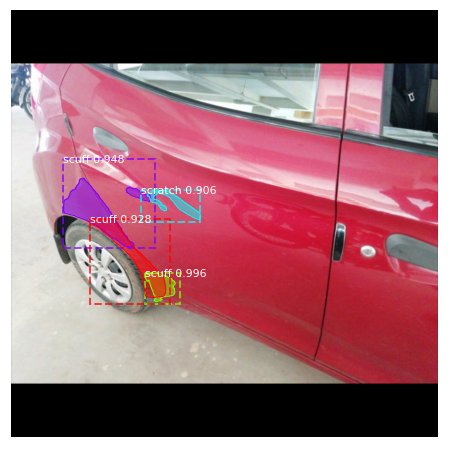

In [ ]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=get_ax())

# Occlusion Maps

In [10]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import keras
from mrcnn.config import Config
from keras.models import load_model

In [11]:
class CustomConfig(Config):
    """Configuration for training on the toy  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "object"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 3  # Background + dent, scratch, scuff

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 5000

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9

In [12]:
class InferenceConfig(CustomConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.



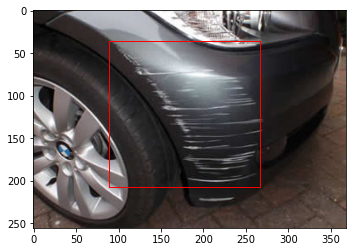

In [13]:
# example of inference with a pre-trained coco model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn import model as modellib, utils
from matplotlib import pyplot
from matplotlib.patches import Rectangle
 
# draw an image with detected objects
def draw_image_with_boxes(filename, boxes_list):
     # load the image
     data = pyplot.imread(filename)
     # plot the image
     pyplot.imshow(data)
     # get the context for drawing boxes
     ax = pyplot.gca()
     # plot each box
     for box in boxes_list:
          # get coordinates
          y1, x1, y2, x2 = box
          # calculate width and height of the box
          width, height = x2 - x1, y2 - y1
          # create the shape
          rect = Rectangle((x1, y1), width, height, fill=False, color='red')
          # draw the box
          ax.add_patch(rect)
     # show the plot
     pyplot.show()
 

# define the model
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=ROOT_DIR)
# load coco model weights
model.load_weights(COCO_WEIGHTS_PATH, by_name=True)

# load photograph
img = load_img('/content/drive/My Drive/DMI/RCNN/Custom_MaskRCNN/samples/custom/dataset/val/set7_Scuff_479.jpg')
img = load_img('/content/drive/My Drive/BlogPost-blog-tech-tuesday-tips-car-bumper-scratch-scuff.jpeg')
img = img_to_array(img)

# make prediction
results = model.detect([img], verbose=0)

# visualize the results
draw_image_with_boxes('/content/drive/My Drive/BlogPost-blog-tech-tuesday-tips-car-bumper-scratch-scuff.jpeg', results[0]['rois'])

In [ ]:
model.keras_model.summary()

Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________

(3, 3, 256, 256)


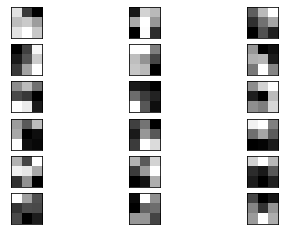

In [14]:
# summarize filters in each convolutional layer
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model

# retrieve weights from the second hidden layer
filters, biases = model.keras_model.layers[357].get_weights()
print(filters.shape)


# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

(1, 224, 224, 3)
(1, 14, 14, 256)


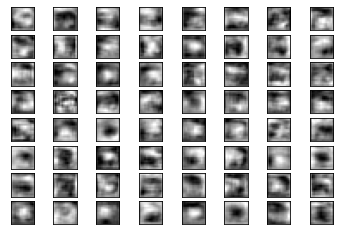

In [15]:
from keras.models import Model

# redefine model to output right after the first hidden layer
new_model = Model(inputs=model.keras_model.layers[0].input, outputs=model.keras_model.layers[357].output)

image = load_img('/content/drive/My Drive/DMI/RCNN/Custom_MaskRCNN/samples/custom/dataset/val/DENTS1078.jpg')
img = img_to_array(image)
img = np.expand_dims(img, axis=0)
print(img.shape)

# get feature map for first hidden layer
#feature_maps = new_model.predict([[0,1,2],[0,1,2],[0,1,2]], [[0,1,2],[0,1,2],[0,1,2]],[[0,1,2],[0,1,2],[0,1,2]])
feature_maps = new_model.predict(img)

print(feature_maps.shape)

# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()


(1, 224, 224, 3)


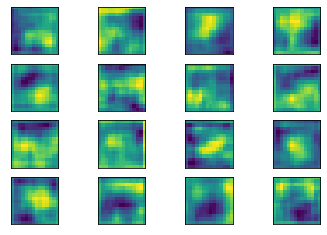

In [16]:
from keras.models import Model

# redefine model to output right after the first hidden layer
new_model = Model(inputs=model.keras_model.layers[0].input, outputs=model.keras_model.layers[357].output)

image = load_img('/content/drive/My Drive/DMI/RCNN/Custom_MaskRCNN/samples/custom/dataset/train/dent_set5_219.jpg', target_size=(224,224))
img = img_to_array(image)
img = np.expand_dims(img, axis=0)
print(img.shape)

# get feature map for first hidden layer
#feature_maps = new_model.predict([[0,1,2],[0,1,2],[0,1,2]], [[0,1,2],[0,1,2],[0,1,2]],[[0,1,2],[0,1,2],[0,1,2]])
feature_maps = new_model.predict(img)

# plot all 64 maps in an 8x8 squares
square = 4
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1])
		ix += 1
# show the figure
pyplot.show()


In [44]:
from vis.visualization import visualize_saliency


In [45]:
!pip show vis.visualization

In [46]:
image = load_img('/content/drive/My Drive/DMI/RCNN/Custom_MaskRCNN/samples/custom/dataset/val/DENTS1078.jpg')
image = img_to_array(image)

activations = model.run_graph([image], [
    ("input_image",        tf.identity(model.keras_model.get_layer("input_image").output)),
    ("res2c_out",          model.keras_model.get_layer("res2c_out").output),  # for resnet100
    ("res3c_out",          model.keras_model.get_layer("res3c_out").output),  # for resnet100
    ("res4w_out",          model.keras_model.get_layer("res4w_out").output),  # for resnet100
    ("mrcnn_detection",          model.keras_model.get_layer("mrcnn_detection").output),  # for resnet100
    ("rpn_bbox",           model.keras_model.get_layer("rpn_bbox").output),
    ("roi",                model.keras_model.get_layer("ROI").output),
])

input_image              shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10001  float32
res2c_out                shape: (1, 256, 256, 256)    min:    0.00000  max:   18.51136  float32
res3c_out                shape: (1, 128, 128, 512)    min:    0.00000  max:   28.80074  float32
res4w_out                shape: (1, 64, 64, 1024)     min:    0.00000  max:   58.06622  float32
mrcnn_detection          shape: (1, 100, 6)           min:    0.00000  max:    3.00000  float32
rpn_bbox                 shape: (1, 261888, 4)        min:  -11.70736  max:  204.75035  float32
roi                      shape: (1, 1000, 4)          min:    0.00000  max:    1.00000  float32


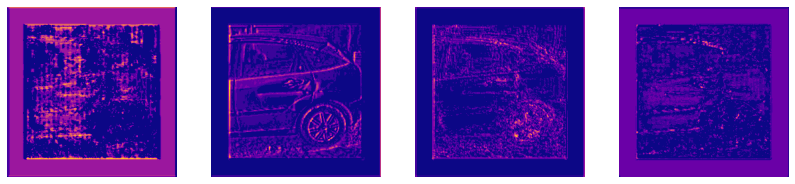

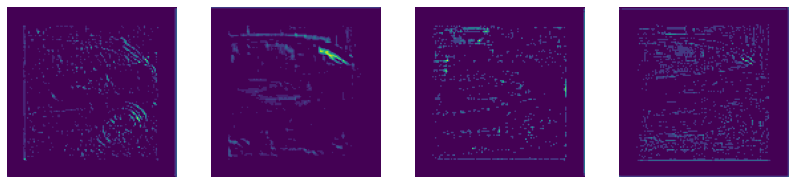

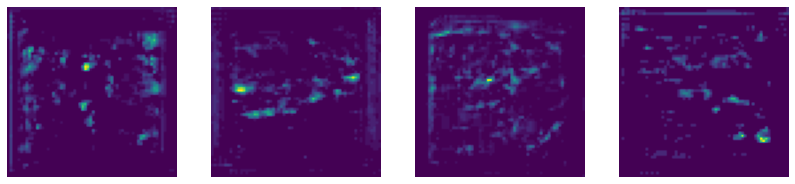

In [47]:
from mrcnn.visualize import display_images
display_images(np.transpose(activations["res2c_out"][0,:,:,:4], [2, 0, 1]), cmap="plasma")
display_images(np.transpose(activations["res3c_out"][0,:,:,:4], [2, 0, 1]))
display_images(np.transpose(activations["res4w_out"][0,:,:,:4], [2, 0, 1]))

In [48]:
import numpy as np
from mrcnn import model as modellib, utils
from mrcnn import visualize
from mrcnn.model import log
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import skimage, skimage.color
from image_tools import *
from metrics import *
from vis.losses import ActivationMaximization
from vis.optimizer import Optimizer
from vis.utils import utils

def plot_saliency_maps(image, layer_grads):
    image_count = len(layer_grads) + 1
    grads_scaling_factor = 20
    # plot original image
    plt.figure(figsize=(20,20))
    plt.subplot(1, image_count, 1)
    plt.title("Image", fontsize=9)
    plt.axis('off')
    plt.imshow(map_image_to_rgb(image) / 256)
    # plot layers saliency maps
    i = 2
    for layer_name in layer_grads:
        # rescale maps to [0..1]
        grads_img = layer_grads[layer_name][0,:,:,:]
        print("ndim is " + str(grads_img.ndim))
        print("shape is " + str(grads_img.shape))
        grads_img = map_image_to_rgb(grads_img)
        print("After RGB, min is " + str(grads_img.min()) + " and max is " + str(grads_img.max()))
        grads_img = grads_img - grads_img.min()
        grads_img = grads_img/grads_img.max()
        grads_img = grads_img * grads_scaling_factor # for brighter visualization
        print("min is " + str(grads_img.min()) + " and max is " + str(grads_img.max()))

        plt.subplot(1, image_count, i)
        plt.title(layer_name, fontsize=9)
        plt.axis('off')
        plt.imshow(grads_img)        
        i += 1
    
    plt.show()


def get_saliency_grads(model, layer_idx, filter_indices, seed_input):
    # define loss to maximize pixels that need to be changed the least to affect activations the most
    losses = [
        (ActivationMaximization(model.layers[layer_idx], filter_indices), -1)
    ]
    input_tensor = model.input[0]
    # run optimization for input image
    opt = Optimizer(input_tensor, losses, wrt_tensor=None, norm_grads=False)
    grads = opt.minimize(seed_input=seed_input, max_iter=1, grad_modifier='absolute', verbose=False)[1]

    return grads

def visualize_saliency_maps(dataset_val, inference_config, model):
    # Test on a random image
    #image_id = 7 
    image_id = np.random.choice(dataset_val.image_ids)
    print(f"Visualizing saliency maps for image {image_id}")

    # load test image and get molded images for  Keras model input
    original_image, _, _, _, _ = modellib.load_image_gt(dataset_val, inference_config, image_id, use_mini_mask = False)
    molded_images, _, _ = model.mold_inputs([original_image])

    # list layers to run saliency gradients on
    layers = {
        'Low-level convolutions': 'res2c_out',
        'Mid-level convolutions': 'res3d_out',
        'High-level convolutions': 'res5c_out',
        'RPN network output': 'fpn_p6',
        'FPN P4': 'fpn_p4'        
    }

    # get saliency map for layers
    layer_grads = {}
    for layer_name in layers:
        layer_idx = utils.find_layer_idx(model.keras_model, layers[layer_name])
        grads = get_saliency_grads(model.keras_model, layer_idx, None, molded_images)
        layer_grads[layer_name] = grads

    plot_saliency_maps(original_image, layer_grads)

In [ ]:
visualize_saliency_maps(dataset_val, inference_config, model)


In [50]:
import numpy as np
from mrcnn import model as modellib, utils
from mrcnn import visualize
from mrcnn.model import log
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import skimage, skimage.color
from image_tools import *
from metrics import *

def get_occlusions(image, size=64):
    occlusion_pixels = np.full((size, size, image.shape[2]), [0], image.dtype)
    occlusions = []
    for x in range(image.shape[0] // size):
        occlusions.append([])
        for y in range(image.shape[1] // size):            
            image_new = image.copy()
            image_new[x*size:(x+1)*size, y*size:(y+1)*size, :] = occlusion_pixels
            occlusions[x].append(image_new)
    return occlusions

def plot_occlusion_map(image, heatmap):
    # rescale heatmap to [0..1]
    heatmap = heatmap - heatmap.min()
    heatmap = heatmap/heatmap.max() 
    heatmap = 1 - heatmap
    heatmap = ndimage.gaussian_filter(heatmap, sigma=(5, 5), order=0)

    # plot image, heatmap and overlap
    plt.figure(figsize=(20,20))
    plt.subplot(1, 3, 1)
    plt.title("Image", fontsize=9)
    plt.axis('off')
    plt.imshow(image)
    plt.subplot(1, 3, 2)
    plt.title("Occlusion map", fontsize=9)
    plt.axis('off')
    plt.imshow(heatmap)
    plt.subplot(1, 3, 3)
    plt.title("Occlusion map overlap", fontsize=9)
    plt.axis('off')
    plt.imshow(image)
    plt.imshow(heatmap, alpha=0.6)
    plt.show()


def visualize_occlusions(dataset_val, inference_config, model):
    # Test on a random image
    image_id = 1012
    #image_id = np.random.choice(dataset_val.image_ids)
    original_image, image_meta, gt_class_id, gt_bbox, gt_mask = \
        modellib.load_image_gt(dataset_val, inference_config,
                                image_id, use_mini_mask = False)
    print(f"Visualizing occlusions for image {image_id}")

    # generate occluded images of a specified size
    occ_size = 32
    occlusions = get_occlusions(original_image, size=occ_size)
    # fill in heatmap for every occlusion
    heatmap = np.zeros((original_image.shape[0], original_image.shape[1]))
    for x in range(len(occlusions)):
        for y in range(len(occlusions[x])):
            image = occlusions[x][y]
            r = model.detect([image], verbose=0)[0]
            _, _, overlaps = utils.compute_matches(
                gt_bbox, gt_class_id, gt_mask,
                r["rois"], r["class_ids"], r["scores"], r['masks'], iou_threshold=0.5)
            overlaps_sum = np.sum(overlaps)
            heatmap[x*occ_size:(x+1)*occ_size,y*occ_size:(y+1)*occ_size] = overlaps_sum
            print(f"  {x},{y}: occlusion {x*len(occlusions[x])+y}/{len(occlusions)*len(occlusions[x])}, overlap sum {overlaps_sum}")

    plot_occlusion_map(map_image_to_rgb(original_image)/256, heatmap)

In [ ]:
visualize_occlusions(dataset_val, inference_config, model)

# Misc Testing

In [ ]:
image_id = np.random.choice(dataset_val.image_ids)
print(f"Visualizing saliency maps for image {image_id}")

# load test image and get molded images for  Keras model input
original_image, _, _, _, _ = modellib.load_image_gt(dataset_val, inference_config, image_id, use_mini_mask = False)
molded_images, _, _ = model.mold_inputs([original_image])

# list layers to run saliency gradients on
layers = {
    'Low-level convolutions': 'res2c_out',
    'Mid-level convolutions': 'res3d_out',
    'High-level convolutions': 'res5c_out',
    'RPN network output': 'fpn_p6',        
}

# get saliency map for layers
layer_grads = {}

layer_idx = utils.find_layer_idx(model.keras_model, 'fpn_p6')
#grads = get_saliency_grads(model.keras_model, layer_idx, None, molded_images)
#layer_grads[layer_name] = grads


Visualizing saliency maps for image 583


In [ ]:
losses = [
    (ActivationMaximization(model.keras_model.layers[layer_idx], None), -1)
]
input_tensor = model.keras_model.input[0]
# run optimization for input image
opt = Optimizer(input_tensor, losses, wrt_tensor=None, norm_grads=False)
grads = opt.minimize(seed_input=molded_images, max_iter=1, grad_modifier='absolute', verbose=False)[1]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


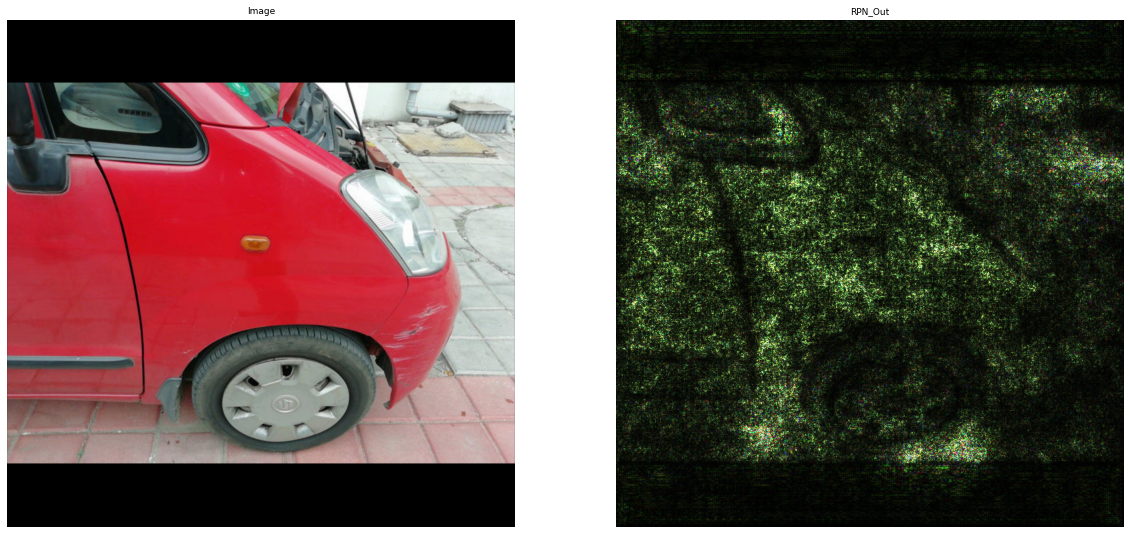

In [ ]:
image_count = 2
grads_scaling_factor = 5
# plot original image
plt.figure(figsize=(20,20))
plt.subplot(1, image_count, 1)
plt.title("Image", fontsize=9)
plt.axis('off')
plt.imshow(map_image_to_rgb(original_image) / 256)
# plot layers saliency maps
i = 2

# rescale maps to [0..1]
grads_img = grads[0,:,:,:]
grads_img1 = map_image_to_rgb(grads_img)
grads_img2 = grads_img1 - grads_img1.min()
grads_img3 = grads_img2/grads_img2.max() 
grads_img35 = grads_img3/0.05
grads_img4 = grads_img3 * grads_scaling_factor # for brighter visualization
plt.subplot(1, image_count, i)
plt.title('RPN_Out', fontsize=9)
plt.axis('off')
plt.imshow(grads_img4)        
i += 1

plt.show()
